In [3]:
import os
import shutil
import re
from concurrent.futures import ProcessPoolExecutor

from sklearn import linear_model
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

from src import contig_stats
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
path = "/media/NGS/Sequences/Listeria_monocytogenes/NCBI"

In [5]:
def run(args):
    fasta, file = args
    id = re.sub(r".fna$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [6]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [7]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_002105635.1,2953920,2953920,2953920,3020953,2
1,GCA_003759905.1,367932,187416,111455,2947987,36
2,GCA_002092815.1,2947562,2947562,2947562,3096332,88
3,GCA_001759645.1,1182923,589603,438637,2900077,15
4,GCA_002445865.1,1302299,429454,211538,2909211,14
5,GCA_003586575.1,744478,479020,257621,2972524,15
6,GCA_000727845.1,1207621,355674,251338,2888379,16
7,GCA_003681015.1,171596,88225,66730,3107839,73
8,GCA_003593805.1,1170049,504123,191400,3050454,31
9,GCA_002487605.1,1376920,545397,435678,2912588,17


Text(0.5, 1.0, 'cumulative Listeria monocytogenes contigs N25, N50, N75')

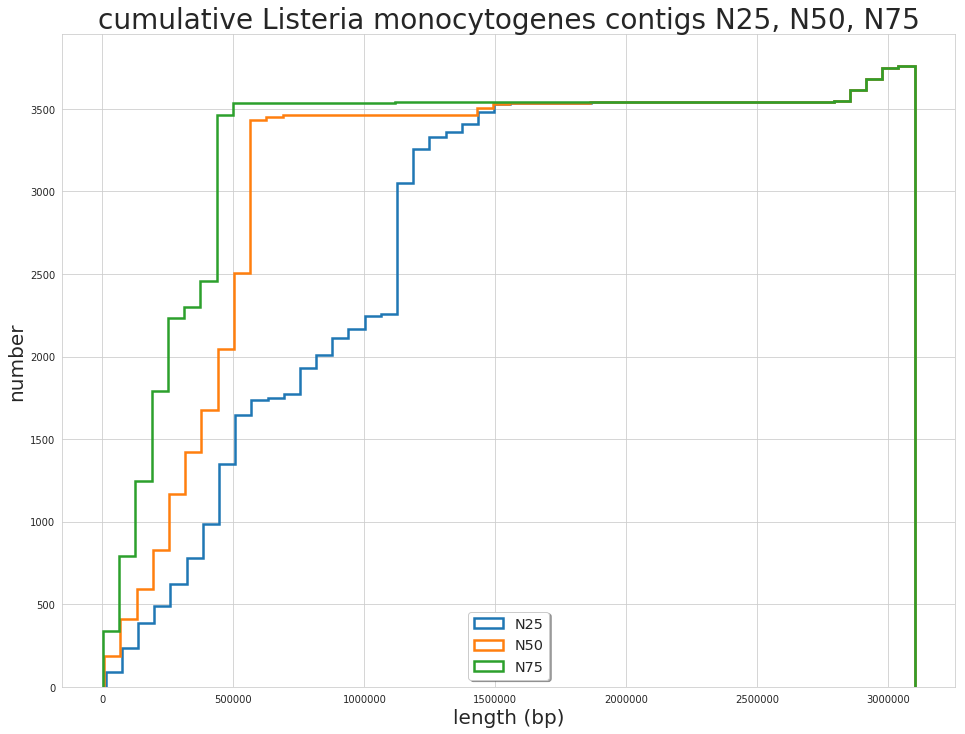

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Listeria monocytogenes contigs N25, N50, N75", fontsize=28)

Text(0.5, 1.0, 'cumulative Listeria monocytogenes contigs N25, N50, N75')

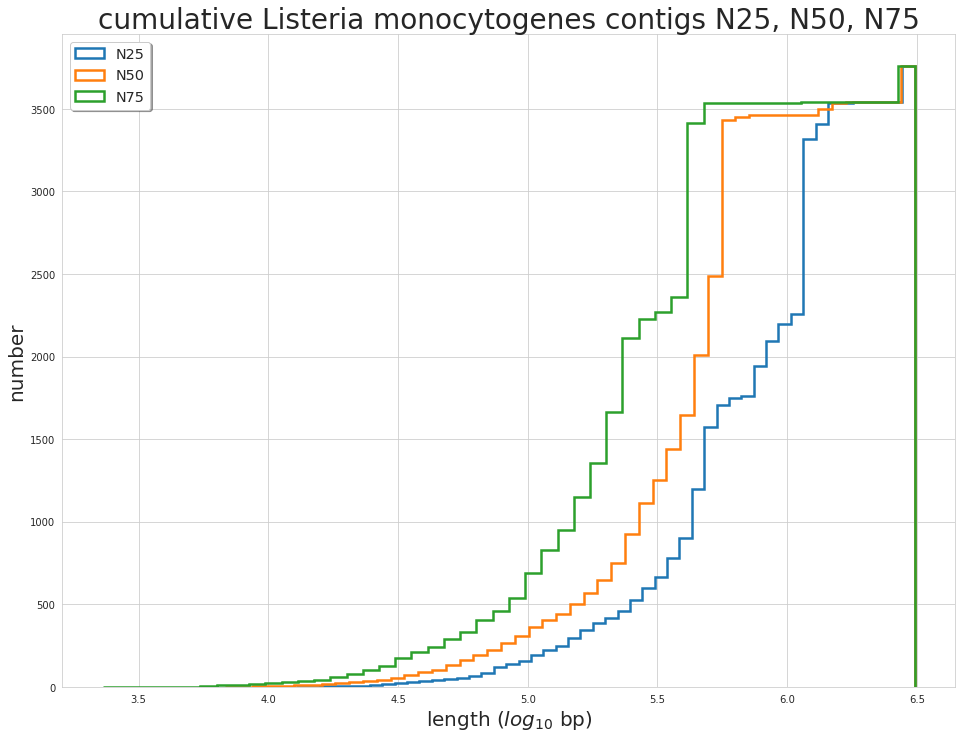

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Listeria monocytogenes contigs N25, N50, N75", fontsize=28)

Text(0.5, 1.0, 'Genome contig number distribution')

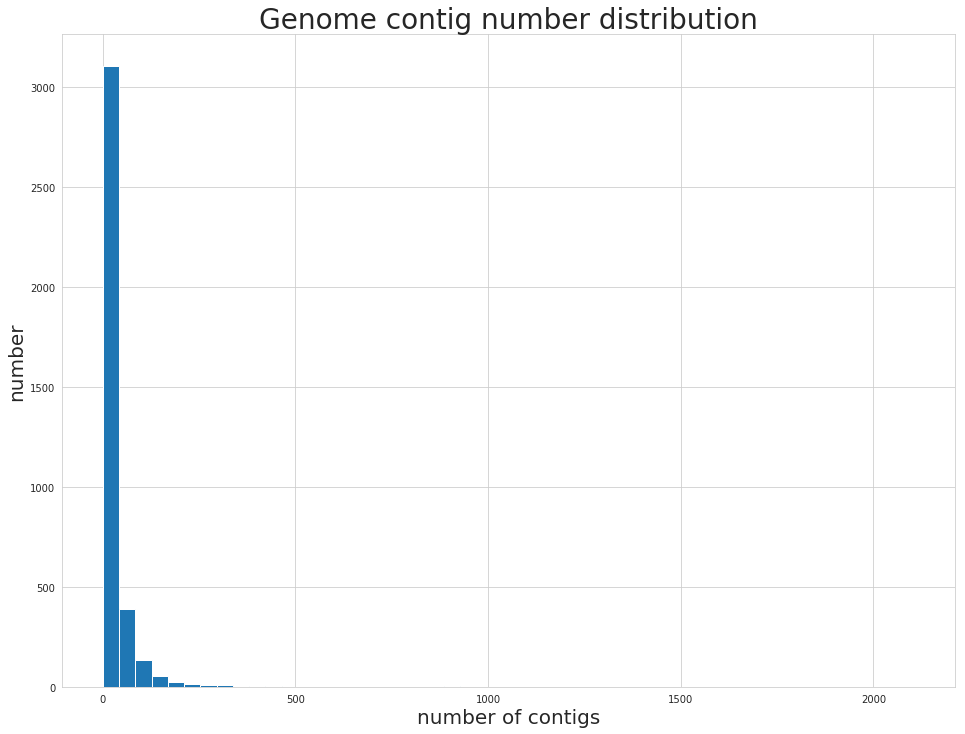

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)

Text(0.5, 1.0, 'Genome contig number distribution (> 200)')

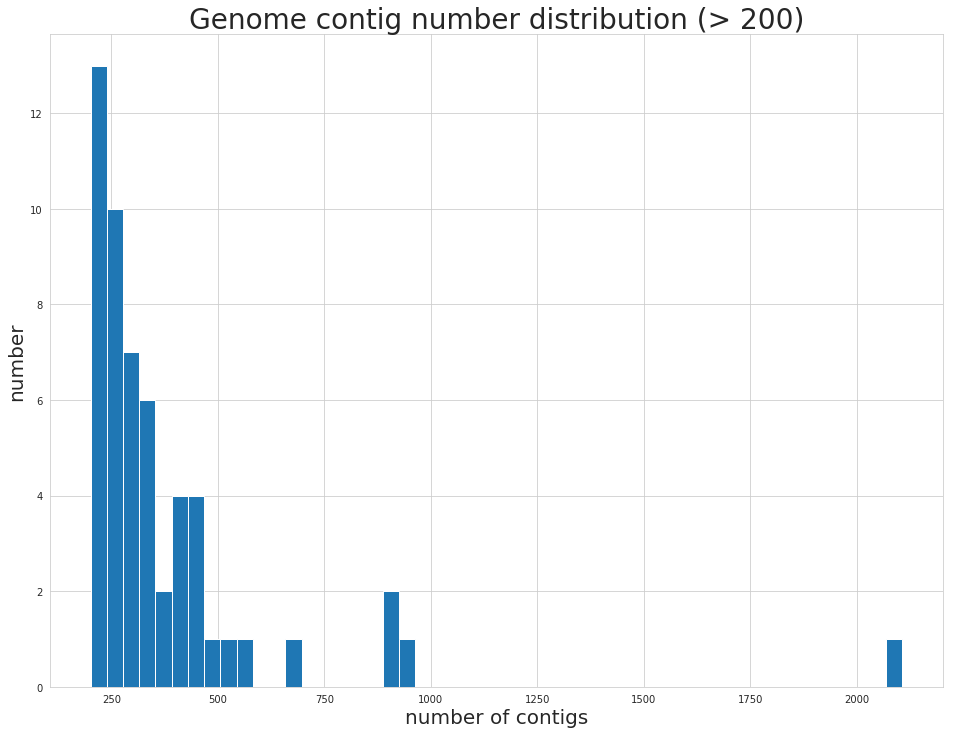

In [23]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 200)", fontsize=28)

Text(0.5, 1.0, 'Genome contig number distribution (<= 200)')

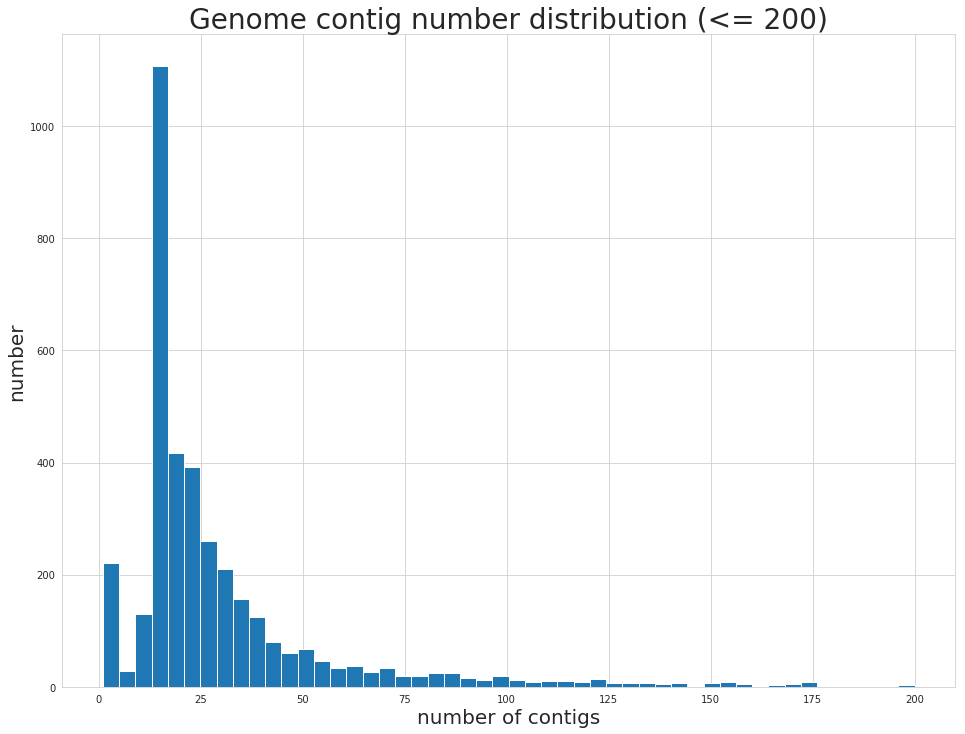

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 200)", fontsize=28)

In [25]:
curated = table[(table["counts"] <= 200) & (table["N50"] >= 10 ** 5.5)]

In [26]:
curated.shape

(2589, 6)

In [27]:
metafile = "/media/NGS/Sequences/Listeria_monocytogenes/METADATA.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
meta['GC%'] = meta['GC%'].astype(str)
meta = meta[meta["GC%"] != "-"]
meta["GC%"] = list(map(lambda x: float(x), meta["GC%"]))
meta

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Listeria monocytogenes EGD-e,EGD-e,20017,SAMEA3138329,PRJNA276,Terrabacteria group,Firmicutes,GCA_000196035.1,2.94453,38.0,chromosome:NC_003210.1/AL591824.1,-,1,3055,2867,2001/11/08,2016/08/28,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Listeria monocytogenes,LM-F-102,20017,SAMN08801602,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188025.1,2.87605,37.9,-,QADB01,7,2944,2837,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
2,Listeria monocytogenes,LM-F-101,20017,SAMN08801601,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188065.1,2.91050,37.9,-,QADA01,14,2973,2865,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
3,Listeria monocytogenes,LM-F-98,20017,SAMN08801599,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188145.1,2.88339,37.9,-,QACY01,13,2969,2858,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
4,Listeria monocytogenes,LM-F-97,20017,SAMN08801598,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188185.1,2.90625,37.9,-,QACX01,16,2968,2863,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
5,Listeria monocytogenes,LM-F-95,20017,SAMN08801597,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188195.1,2.90180,37.9,-,QACW01,25,2956,2857,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
6,Listeria monocytogenes,LM-F-92,20017,SAMN08801596,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188265.1,3.04827,37.8,-,QACV01,27,3111,2978,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
7,Listeria monocytogenes,LM-F-89,20017,SAMN08801594,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188425.1,2.90969,37.9,-,QACT01,22,2947,2815,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
8,Listeria monocytogenes,LM-F-88,20017,SAMN08801593,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188435.1,2.90363,37.9,-,QACS01,21,2927,2822,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
9,Listeria monocytogenes,LM-F-87,20017,SAMN08801592,PRJNA374027,Terrabacteria group,Firmicutes,GCA_003188505.1,3.00911,37.9,-,QACR01,11,3123,3000,2018/06/05,2018/06/07,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...


In [28]:
curated = pd.merge(curated, meta, left_index=True, left_on='id', right_on="Assembly")

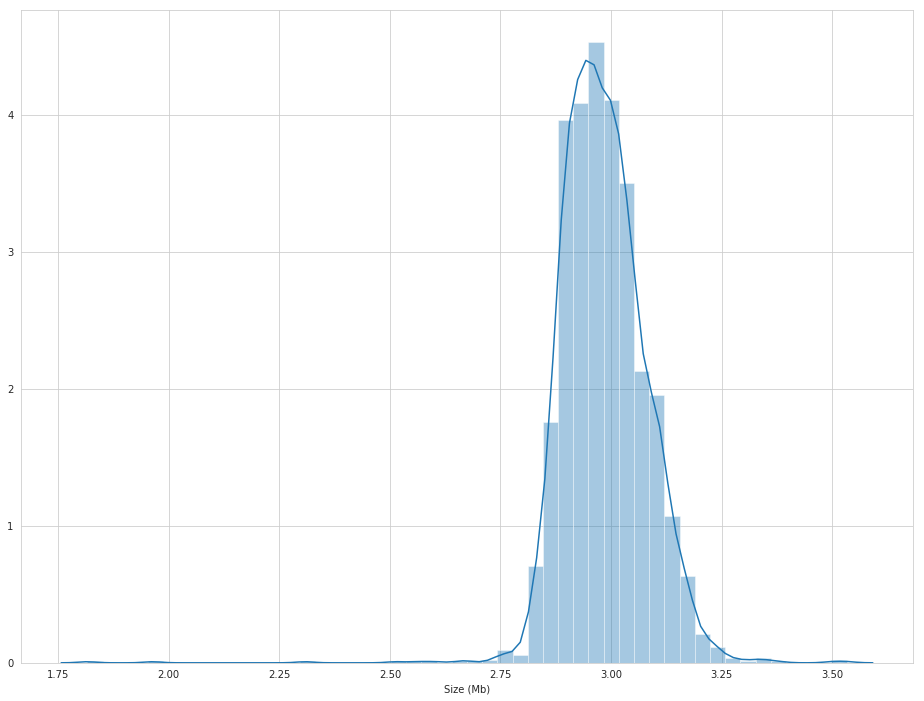

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)

/home/chen1i6c04/.conda/envs/Notebook/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


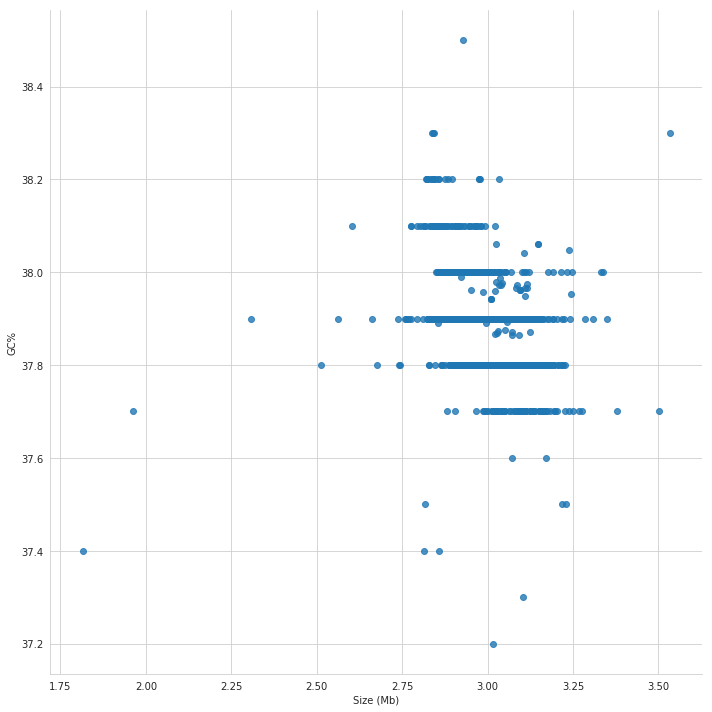

In [30]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)

In [47]:
model = linear_model.HuberRegressor(epsilon=3.8)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

/home/chen1i6c04/.conda/envs/Notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


HuberRegressor(alpha=0.0001, epsilon=3.8, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [48]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

/home/chen1i6c04/.conda/envs/Notebook/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


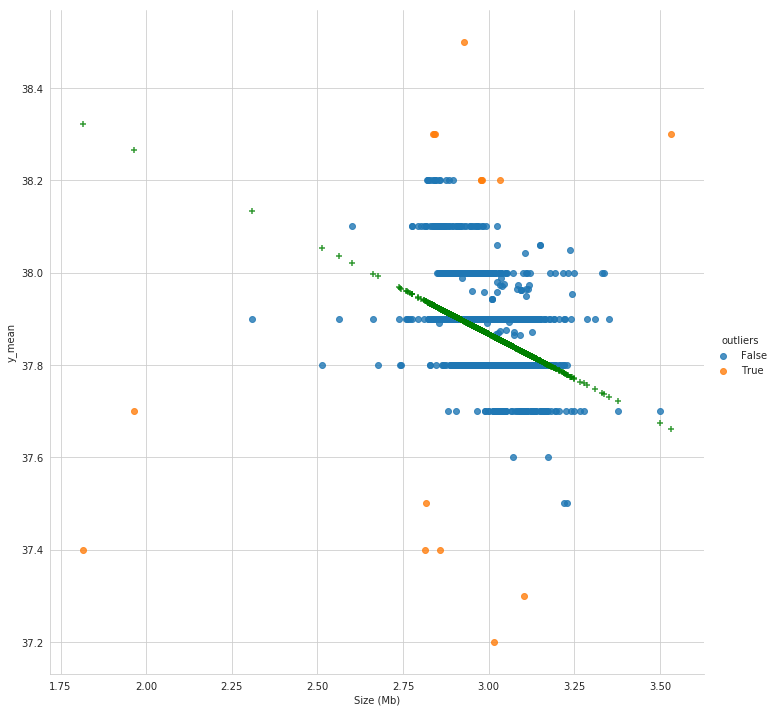

In [49]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)

In [50]:
curated[curated['outliers']]

,id,N25,N50,N75,total_length,counts,#Organism/Name,Strain,CladeID,BioSample,...,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP,y_mean,corrected_y,outliers
2410,GCA_000021185.1,2976212,2976212,2976212,2976212,1,Listeria monocytogenes HCC23,HCC23,20017,SAMN02603154,...,3080,2941,2008/12/12,2017/02/26,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,37.875915,0.324085,True
3559,GCA_003812565.1,2836861,2836861,2836861,2836861,1,Listeria monocytogenes,FDAARGOS_554,20017,SAMN10163247,...,2863,2744,2018/11/21,2018/11/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...,37.929557,0.370443,True
195,GCA_003097435.1,618672,509977,238557,3034007,110,Listeria monocytogenes,N16-0855,20017,SAMN08995139,...,3121,3020,2018/05/07,2018/08/29,Contig,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...,37.853665,0.346335,True
2402,GCA_001454885.1,2842039,2842039,2842039,2842039,1,Listeria monocytogenes,WSLC 1020,20017,SAMN04286630,...,2865,2743,2015/12/01,2017/03/01,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...,37.927563,0.372437,True
3749,GCA_003904255.1,1223337,453585,270805,3015950,21,Listeria monocytogenes,2015L-6722,-,SAMN10241676,...,3117,3014,2018/12/07,2018/12/07,Contig,-,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...,37.860617,-0.660617,True
1287,GCA_003682295.1,1301410,566661,492223,3103882,22,Listeria monocytogenes,CFSAN083823,-,SAMN09765449,...,3208,3093,2018/10/23,2018/10/23,Contig,-,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...,37.826769,-0.526769,True
885,GCA_900017475.1,1182923,589603,438637,2900077,15,Listeria monocytogenes,2842STDY5753961,20137,SAMEA2383382,...,2787,2672,2016/02/09,2017/03/02,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...,37.937614,-0.437614,True
2433,GCA_000307065.1,2840185,2840185,2840185,2840185,1,Listeria monocytogenes SLCC2376,SLCC2376,20017,SAMEA2272177,...,2864,2741,2012/09/10,2017/02/26,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,37.928279,0.371721,True
772,GCA_000168375.1,1182923,589603,438637,2900077,15,Listeria monocytogenes FSL F2-515,FSL F2-515,20017,SAMN00777160,...,-,-,2006/10/13,2013/11/19,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,38.322533,-0.922533,True
2756,GCA_001825735.1,1182923,589603,438637,2900077,15,Listeria monocytogenes,BCW_2997,20017,SAMN03358733,...,2910,2792,2016/09/29,2017/03/02,Scaffold,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...,37.921589,-0.521589,True


In [51]:
curated = curated[~curated['outliers']]

In [36]:
# dst = "/media/NGS/Sequences/Listeria_monocytogenes/NCBI_complete_clean"
# for file in curated["id"]:
#     shutil.copyfile(os.path.join(path, file + ".fna"), os.path.join(dst, file + ".fna"))

In [53]:
curated.to_csv('../cgMLST_DB/Listeria_monocytogenes/clean_metadata.csv', index=0)